## A. Στοιχεία Ομάδας

Αριθμός Ομάδας: Μ.Α.11

> Καρυπιάδης Ευστράτιος: 03114911 

---

## Β. Εισαγωγή του Dataset

Το dataset μας προκύπτει έπειτα απο την εφαρμογή του συστήματος _HIPS (Hierarchical Image Processing System)_ σε σειρά εικόνων οχημάτων, οι οποίες ελήφθησαν για 4 διαφορετικά οχημάτα και κάτω από τις ίδιες συνθήκες φωτισμού και γωνίας λήψης. Τα χαρακτηριστικά που εξήχθησαν αποτελούν και τις στήλες των δεδομένων μας, βάσει των οποίων θα επιχειρήσουμε να ταξινομήσουμε τα δείγματα που έχουμε στην διάθεσή μας στην αντίστοιχη κατηγορία που ανήκουν.

Τα αρχεία δεδομένων μας είναι χωρισμένα σε 9 διαφορετικά αρχεία τα οποία θα ενώσουμε σε ένα _DataFrame_. Δεν υπάρχει αρίθμηση για κάθε διαφορετικό δείγμα - γραμμή, αλλά ούτε ονομασία για τα χαρακτηριστικά μας. Για αυτό το λόγο θα ονοματίσουμε της στήλες των δεδομένων μας, συμβουλεύομενοι την περιγραφή του dataset.

In [283]:
import glob
import pandas as pd

path = 'Data'
all_data = glob.glob(path + "/*.dat")

l = []

column_names = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio',
                'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 
                'max.length_rectangularity', 'major.axis_scaled_variance', 'minor.axis_scaled_variance',
                'gyration_scaled_radius', 'major.axis skewness', 'minor.axis_skewness', 'minor.axis_kurtosis',
                'major.axis_curtosis', 'hollows_ratio', 'label']

for filename in all_data:
    df = pd.read_csv(filename, header=None, sep=' ', names = column_names, usecols= [num for num in range(19)])
    l.append(df)
    
cars = pd.concat(l, axis=0, ignore_index=True)
cars.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,major.axis_scaled_variance,minor.axis_scaled_variance,gyration_scaled_radius,major.axis skewness,minor.axis_skewness,minor.axis_kurtosis,major.axis_curtosis,hollows_ratio,label
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


Στη συνέχεια θα εξάγουμε χρήσιμες πληροφορίες για τα δεδομένα μας.

In [284]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                   846 non-null int64
circularity                   846 non-null int64
distance_circularity          846 non-null int64
radius_ratio                  846 non-null int64
pr.axis_aspect_ratio          846 non-null int64
max.length_aspect_ratio       846 non-null int64
scatter_ratio                 846 non-null int64
elongatedness                 846 non-null int64
pr.axis_rectangularity        846 non-null int64
max.length_rectangularity     846 non-null int64
major.axis_scaled_variance    846 non-null int64
minor.axis_scaled_variance    846 non-null int64
gyration_scaled_radius        846 non-null int64
major.axis skewness           846 non-null int64
minor.axis_skewness           846 non-null int64
minor.axis_kurtosis           846 non-null int64
major.axis_curtosis           846 non-null int64
hollows_ratio                 846 non-null int64
label        

In [285]:
cars.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,major.axis_scaled_variance,minor.axis_scaled_variance,gyration_scaled_radius,major.axis skewness,minor.axis_skewness,minor.axis_kurtosis,major.axis_curtosis,hollows_ratio
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


Παρατηρούμε ότι έχουμε στη διάθεσή μας 846 δείγματα, καθένα από τα οποία συνοδεύεται από 18 συνολικά χαρακτηριστικά. Τα χαρακτηριστικά αυτά είναι αριθμοί, ενώ δεν υπάρχει στήλη στην οποία να απουσιάζουν τιμές. Η τελευταία στήλη αντιστοιχεί στις ετικέτες των δεδομένων μας, οι οποίες ωστόσο είναι σε μορφή κειμένου και τις οποίες δε χρειάζεται να κωδικοποιήσουμε.

In [286]:
cars['label'].value_counts(normalize=True) * 100

bus     25.768322
saab    25.650118
opel    25.059102
van     23.522459
Name: label, dtype: float64

Σημειώνουμε ότι οι κατηγορίες των οχημάτων μας είναι 4 και φέρουν τα ονόματα: _Bus, Van, Opel_ και _Saab_. Έχουμε ισορροπία στο σύνολο των δεδομένων, αφού όπως υπολογίζουμε κάθε κατηγορία συναστά περίπου το 1/4 του dataset.

Αν και οι κατηγορίες μας είναι ισορροπημένες στο σύνολο των δεδομένων μας, για το διαχωρισμό αυτών θα χρησιμοποιήσουμε τη _StratifiedShuffleSplit_ ώστε να εξασφαλίσουμε ότι τα δεδομένα εκπαίδευσης θα αποτελούνται από αντιπροσωπευτικό πλήθος κατηγοριών με το ολικό dataset.

In [287]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(cars, cars["label"]):
    train_set = cars.reindex(train_index)
    test_set = cars.reindex(test_index)
    
train_set["label"].value_counts() / len(train_set) * 100

bus     25.739645
saab    25.591716
opel    25.147929
van     23.520710
Name: label, dtype: float64

Τέλος, θα διαχωρίσουμε τα χαρακτηριστικά των δεδομένων μας από την κατηγορία στην οποία ανήκουν:

In [288]:
# Training Set
cars_train_set = train_set.drop("label", axis=1)
cars_train_labels = train_set["label"].copy()

# Test Set
cars_test_set = test_set.drop("label", axis=1)
cars_test_labels = test_set["label"].copy()

___

## Γ. Baseline Classification

- _DummyClassifier_

In [289]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dc_default = DummyClassifier() # default strategy: stratified
dc_default.fit(cars_train_set, cars_train_labels) # fitting on train_set

cars_predictions = dc_default.predict(cars_test_set) # predicting on test_set

target_names = dc_default.classes_.tolist()

accuracy_score(cars_test_labels, cars_predictions) * 100

32.94117647058823

In [290]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(cars_test_labels, cars_predictions)

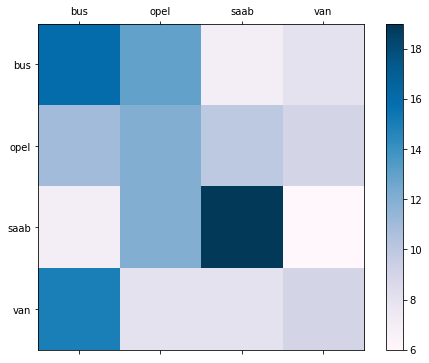

In [291]:
from matplotlib import cm

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)
plt.show()

In [292]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [293]:
from sklearn.metrics import classification_report

rpt = classification_report(cars_test_labels, cars_predictions, target_names=target_names)
print(rpt)

              precision    recall  f1-score   support

         bus       0.33      0.36      0.34        44
        opel       0.27      0.29      0.28        42
        saab       0.43      0.43      0.43        44
         van       0.28      0.23      0.25        40

    accuracy                           0.33       170
   macro avg       0.33      0.33      0.33       170
weighted avg       0.33      0.33      0.33       170



- _KNeighborsClassifier_

In [294]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # default n: 5
knn.fit(cars_train_set, cars_train_labels) # fitting on train_set

cars_predictions = knn.predict(cars_test_set) # predicting on test_set

target_names = knn.classes_

accuracy_score(cars_test_labels, cars_predictions) * 100

67.05882352941175

In [295]:
matrix = confusion_matrix(cars_test_labels, cars_predictions)

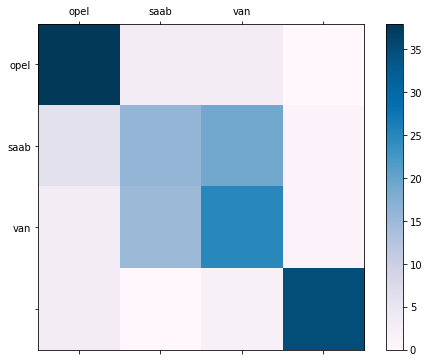

In [296]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)
plt.show()

In [297]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [298]:
rpt = classification_report(cars_test_labels, cars_predictions, target_names=target_names)
print(rpt)

              precision    recall  f1-score   support

         bus       0.76      0.86      0.81        44
        opel       0.47      0.38      0.42        42
        saab       0.51      0.57      0.54        44
         van       0.95      0.88      0.91        40

    accuracy                           0.67       170
   macro avg       0.67      0.67      0.67       170
weighted avg       0.67      0.67      0.67       170

